# Qualitative Data Anlysis

## Theming

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Theming
sns.set_theme()
sns.set_style("white") # could be whitegrid

# from https://jwalton.info/Embed-Publication-Matplotlib-Latex/
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 8,
    "font.size": 8,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

# Assign colors so they stay consistent
colors = {
    'A': sns.color_palette('bright').as_hex()[2],
    'B': sns.color_palette('bright').as_hex()[5],
    'Jayvee': sns.color_palette('bright').as_hex()[1],
    'Python': sns.color_palette('bright').as_hex()[0]
}

# Theoretical saturation

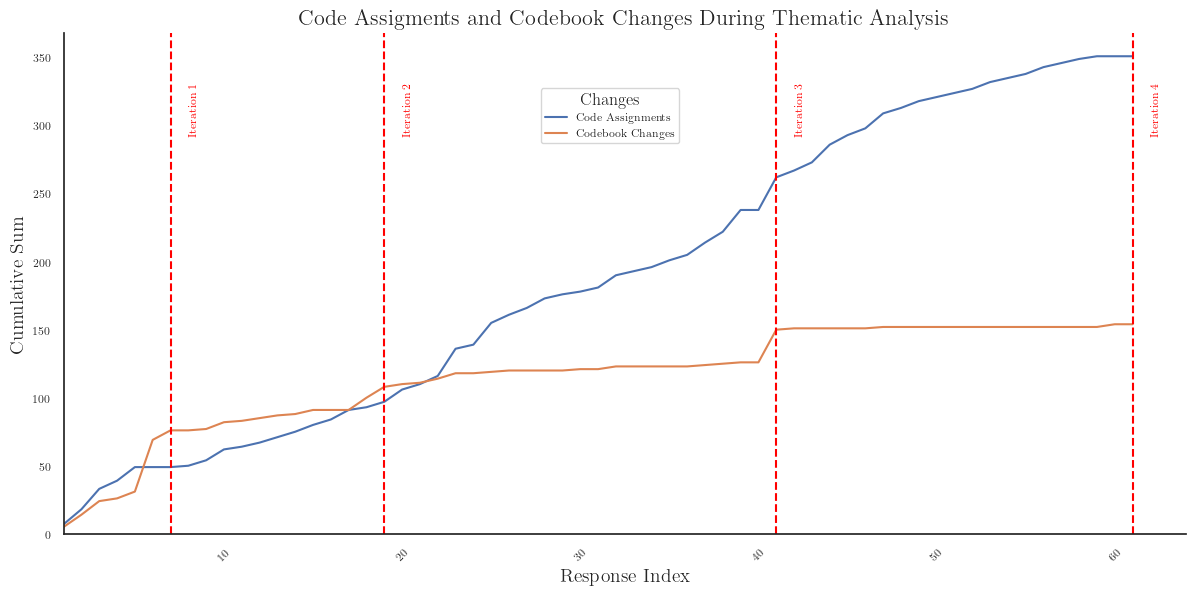

In [2]:
df = pd.read_csv('./survey/qda.csv')

df = df.set_index('index').cumsum().reset_index()

df = df.rename(columns={
    'codes_assigned': 'Code Assignments',
    'codes_created': 'Codes Created',
    'codes_deleted': 'Codes Deleted',
    'codes_changed_moved': 'Codes Moved',
    'codes_changed_meaning': 'Codes Changed Meaning',
    'themes_created': 'Themes Created',
    'themes_deleted': 'Themes Deleted',
    'themes_changed': 'Themes Changed',
    })

df['Codebook Changes'] = (df['Codes Created'] +
                       df['Codes Deleted'] +
                       df['Codes Moved'] +
                       df['Codes Changed Meaning'] +
                       df['Themes Created'] +
                       df['Themes Deleted'] +
                       df['Themes Changed'])

df_melted = df[[
    'index',
    'Code Assignments',
    'Codebook Changes',
    ]].melt(id_vars='index', var_name='Changes', value_name='value')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='index', y='value', hue='Changes')

# Add titles and labels
plt.title('Code Assigments and Codebook Changes During Thematic Analysis', fontsize=16)
plt.xlabel('Response Index', fontsize=14)
plt.ylabel('Cumulative Sum', fontsize=14)
plt.xticks(rotation=45)

# Adding vertical lines with labels at specific indexes
highlight_indexes = [7, 19, 41, 61]
highlight_labels = ['Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4']

for i, label in zip(highlight_indexes, highlight_labels):
    plt.axvline(x=i, color='red', linestyle='--')
    plt.text(i + 1, plt.ylim()[1] * 0.9, label, color='red', rotation=90, verticalalignment='top')

# Set the x and y axis limits to start from 0
plt.xlim(left=1)
plt.ylim(bottom=0)

# Customize the plot appearance
sns.despine()
plt.legend(title='Changes', bbox_to_anchor=(0.42, 0.9), loc='upper left')
plt.tight_layout()

plt.show()